In [47]:
#Simple neural network
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [48]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
tips=pd.get_dummies(tips, drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [50]:
x=tips.drop('tip',axis=1)
y=tips['tip']

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [52]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [54]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(64,activation='relu', input_shape=(x_train.shape[1],)),
tf.keras.layers.Dense(32,activation='relu'),
tf.keras.layers.Dense(1)])

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [56]:
history=model.fit(x_train, y_train , epochs=100, batch_size=32 , verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0000e+00 - loss: 12.8869 - val_accuracy: 0.0000e+00 - val_loss: 7.4422
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0013 - loss: 10.6518 - val_accuracy: 0.0204 - val_loss: 5.7840
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0101 - loss: 7.6873 - val_accuracy: 0.0204 - val_loss: 4.3372
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0171 - loss: 5.9450 - val_accuracy: 0.0204 - val_loss: 3.1248
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0236 - loss: 4.0258 - val_accuracy: 0.0204 - val_loss: 2.1809
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0236 - loss: 3.4970 - val_accuracy: 0.0204 - val_loss: 1.5491
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0189 - loss: 2.3495 - val_accuracy: 0.0204 - val_loss: 1.2444
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0173 - loss: 2.1017 - val_accuracy: 0.0204 -

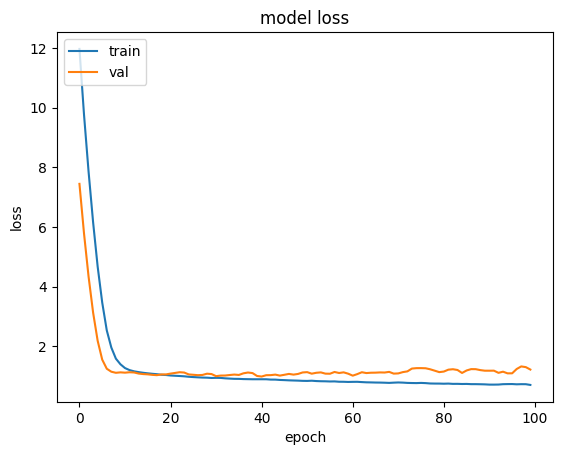

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')